# UNSUPERVISED LEARNING

- tidak punya target, hanya punya feature
- cara kerjanya mengelompokkan berdasarkan kemiripan

ada 2 tipe Unsupervised Learning:

- Unsupervised Transformation
    *
    *
- Clustering
    *
    *

Task :
- Scale the features using Standard Scaler
- Compute how much information extracted using two components
- Reduce the dimension from 30 to 2 using two components
- Plot the first components and the second components
    - x axis first component
    - y axis second component
    - hue : Diagnosis


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
cancer = load_breast_cancer()
# cancer

In [3]:
# Scaling

scaler = StandardScaler()
scaler.fit(cancer.data) # ambil yg data (features)
X_scaled = scaler.transform(cancer.data)

In [4]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# Information Extracted

bearapa persen informasi yang kita simpan setelah PCA, apabila kita hanya mengambil 2 komponen PCA

In [5]:
from sklearn.decomposition import PCA

# buat 30 component
pca = PCA(n_components=30) # berapa component yg dikeep
pca.fit(X_scaled)

# transform data
X_pca = pca.transform(X_scaled)

In [6]:
variance = []

for i in range(0,30):
    variance.append(np.var(X_pca[:,i]))

In [7]:
print('information extracted {} %'.format(np.sum(variance[:2])*100/np.sum(variance)))

# apabila kita hanya mengambil 2 komponen pertama (variance[:2]), berapa % informasi yang tersimpan

information extracted 63.24320765155943 %


# Reducing Dimension (30 to 2)

In [8]:
# hanya keep 2 components
pca = PCA(n_components=2) # berapa component yg dikeep
pca.fit(X_scaled)

# transform data
X_pca = pca.transform(X_scaled)

In [9]:
print('original shape: {}'.format(str(X_scaled.shape)))
print('reduced shape: {}'.format(str(X_pca.shape)))

original shape: (569, 30)
reduced shape: (569, 2)


# Scater Plot and Clustering Result

Text(0, 0.5, 'Second Component')

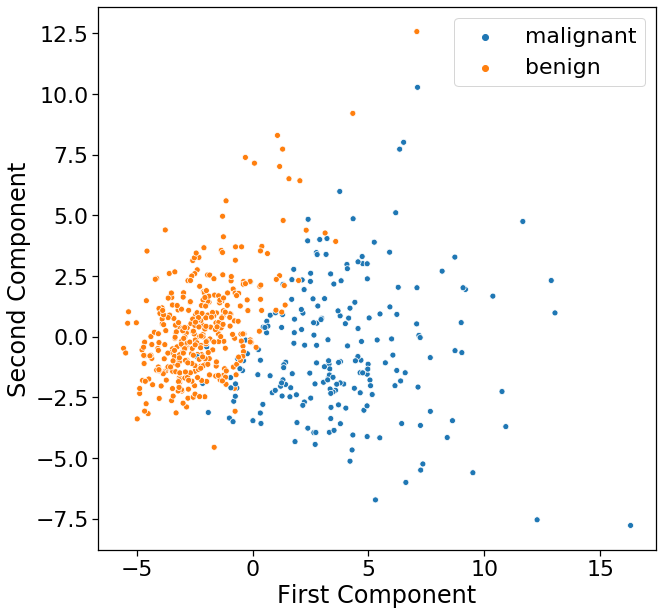

In [10]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    X_pca[:,0], 
    X_pca[:,1], 
    hue = np.where(cancer.target,'benign','malignant'))

plt.xlabel('First Component')
plt.ylabel('Second Component')


In [11]:
df = pd.read_csv('CC GENERAL.csv')
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [12]:
X = df.drop(columns=['CUST_ID','TENURE'])
X = X.dropna()
X.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000


In [13]:
# Scaling

scaler = StandardScaler()
 # ambil yg data (features)
X_scaled = scaler.fit_transform(X)

### Tanpa Scaling

In [14]:
# buat 16 component (semua feature)
pca = PCA(n_components=16) # berapa component yg dikeep
pca.fit(X)

# transform data
X_pca = pca.transform(X)

In [15]:
variance = []

for i in range(0,16):
    variance.append(np.var(X_pca[:,i]))

In [16]:
print('information extracted {} %'.format(np.sum(variance[:2])*100/np.sum(variance)))

information extracted 65.30758351408072 %


### Dengan Scaling

In [17]:
# buat 16 component (semua feature)
pca = PCA(n_components=16) # berapa component yg dikeep
pca.fit(X_scaled)

# transform data
X_pca = pca.transform(X_scaled)

# looping variance
variance = []
for i in range(0,16):
    variance.append(np.var(X_pca[:,i]))

print('information extracted with scaling {} %'.format(np.sum(variance[:2])*100/np.sum(variance)))

information extracted with scaling 50.442364493063415 %


# CLUSTERING K-Means 1

mirip prinsipnya dengan KNN, melihat jarak terdekat antar point

- Generate data using make_blobs with random_state = 42
- plot the data using scatter plot
- fit k-means method (3 clusters)
- plot the data and clustering result using scatter plot


In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


## Generate Data

In [19]:
X, y = make_blobs(random_state=42)

## Scatter Plot

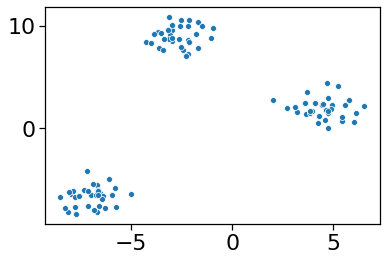

In [20]:
sns.scatterplot(X[:,0], X[:,1])

## Fit K-Means

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

## Scatterplot and Clustering Result

In [22]:
kmeans.labels_

array([1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0,
       0, 2, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0])

In [23]:
kmeans.cluster_centers_

array([[-2.66780392,  8.93576069],
       [-6.95170962, -6.67621669],
       [ 4.49951001,  1.93892013]])

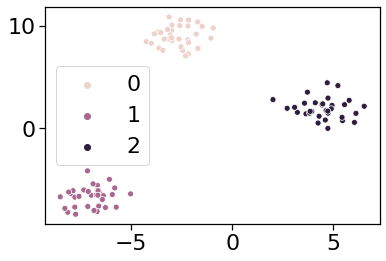

In [24]:
sns.scatterplot(X[:,0], X[:,1], hue=kmeans.labels_)

Analyze data “ilustrasi k means.csv”

- plot the data using scatter plot
- determine the optimal number of cluster
    - elbow method
    - silhouette method
- plot the data and clustering result (optimal number of cluster) using scatter plot


## Data

In [25]:
df = pd.read_csv('ilustrasi k means.csv', sep=';')
X = df

X.head(3)

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166


## Scatter Plot

## Determine The Optimal Number of Cluster

In [26]:
from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score 


### 1. Elbow Method

In [27]:
# clustering variation
number_of_cluster = range(2,11)
clusterings = [KMeans(n_clusters=k).fit(X) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings]

# within sumsq
D_k = [cdist(X, cent, 'euclidean') for cent in centroids] 
cIdx = [np.argmin(D, axis=1) for D in D_k] 
dist = [np.min(D, axis=1) for D in D_k] 
avgWithinSS = [sum(d)/X.shape[0] for d in dist]


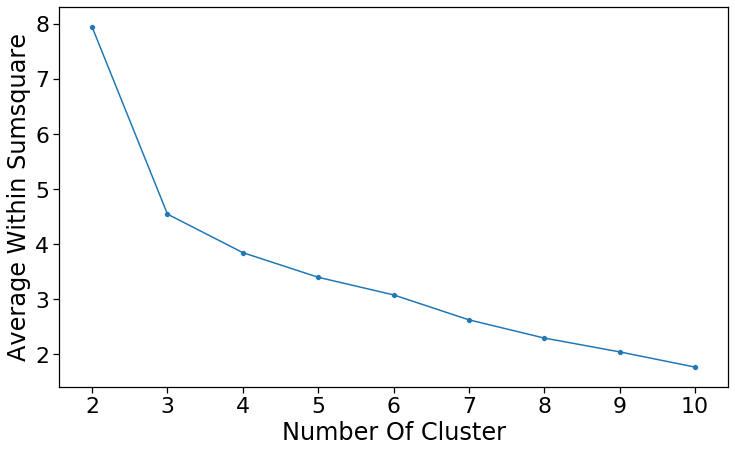

In [28]:
plt.figure(figsize=(12,7))
sns.lineplot(number_of_cluster, avgWithinSS)
sns.scatterplot(number_of_cluster, avgWithinSS)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within Sumsquare')
plt.show()


#### optimum cluster ada di 3, karena disitu tempat tutn drastis nilai average within sumsquare

### 2. Shillouette Score

kombinasi:
* jarak antar data poin dalam 1 cluster, 
* dan jarak data poin dalam 1 cluster dengan data point cluster lainnya

nilainya -1 sampai 1:
* paling bagus yg mendekati 1

In [29]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [30]:
labels = kmeans.labels_
silhouette_score(X, labels, metric= 'euclidean')

0.5080353833629737

In [31]:
silhouette_scores = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X) 

    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels, metric= 'euclidean'))

<function matplotlib.pyplot.show(*args, **kw)>

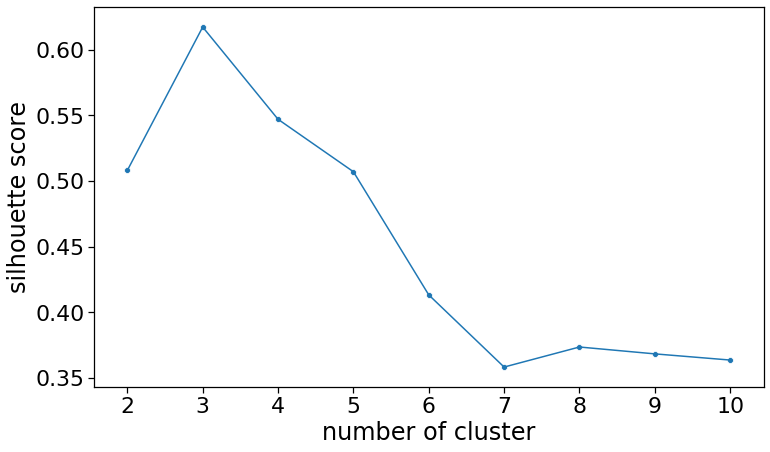

In [32]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xlabel('number of cluster')
plt.ylabel('silhouette score')
plt.show

### Final Result

In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [34]:
df['cluster'] = kmeans.labels_
df

,tinggibadan,tinggibadanistri,cluster
0,175,175,2
1,178,178,2
2,175,166,1
3,180,179,2
4,185,181,2
5,178,163,1
6,175,158,1
7,181,154,1
8,168,155,1
9,171,154,1


Text(0, 0.5, 'Tinggi Badan Istri')

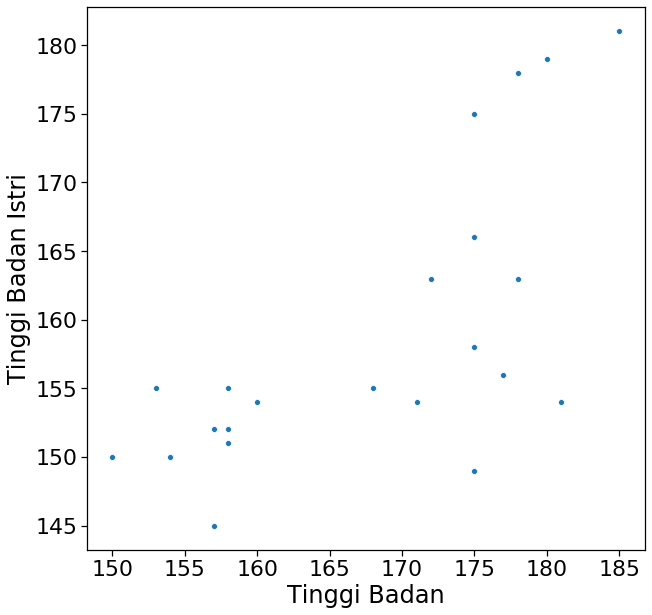

In [35]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'tinggibadan', 
    y = 'tinggibadanistri', 
    data = df)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

# LATIHAN

Pakai Mall_Customers.csv sebagai data untuk clustering K-means model.
* drop CustomerID dan ubah feature gender menjadi 0 untuk pria dan 1 untuk wanita
* carilah nilai K terbaik untuk membentuk cluster.
* coba visualisasikan data hasil clustering kalian dengan kombinasi feature-feature yang ada. (ex: Gender& Age; Gender& Annual Income, Age & Annual income, dst)


In [36]:
df_mall = pd.read_csv('Mall_Customers.csv')
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
X = df_mall.drop(columns=['CustomerID'])

X['Gender'] = np.where(X['Gender']=='Male', 0, 1)

X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## 1. Elbow Method

In [38]:
# clustering variation
number_of_cluster = range(2,11)
clusterings = [KMeans(n_clusters=k).fit(X) for k in number_of_cluster]
centroids = [k.cluster_centers_ for k in clusterings]

# within sumsq
D_k = [cdist(X, cent, 'euclidean') for cent in centroids] 
cIdx = [np.argmin(D, axis=1) for D in D_k] 
dist = [np.min(D, axis=1) for D in D_k] 
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

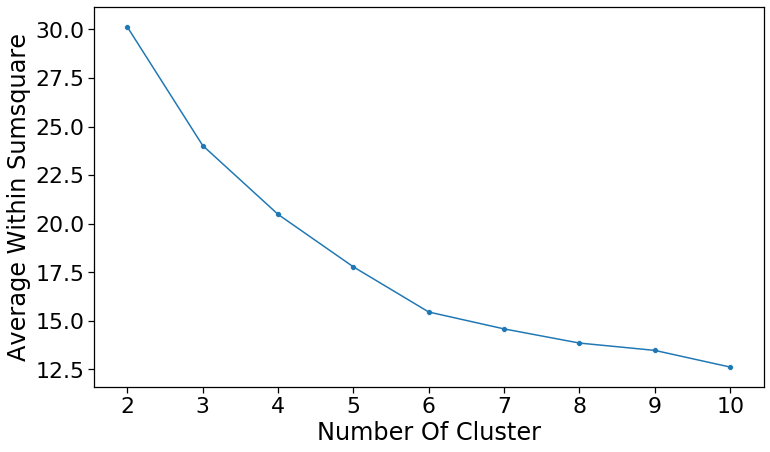

In [39]:
plt.figure(figsize=(12,7))
sns.lineplot(number_of_cluster, avgWithinSS)
sns.scatterplot(number_of_cluster, avgWithinSS)

plt.xticks(number_of_cluster)

plt.xlabel('Number Of Cluster')
plt.ylabel('Average Within Sumsquare')
plt.show()

#### kalau melihat dari penurunan nilai Avg Within Smsqr, maka elbownya ada di 6, tapi tidak terlalu menyiku, jadi kurang pasti

## 2. Silhouette Score

In [40]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

labels = kmeans.labels_
silhouette_score(X, labels, metric= 'euclidean')

0.29307334005502633

In [41]:
silhouette_scores = []
number_of_cluster = range(2,11)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X) 

    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels, metric= 'euclidean'))

<function matplotlib.pyplot.show(*args, **kw)>

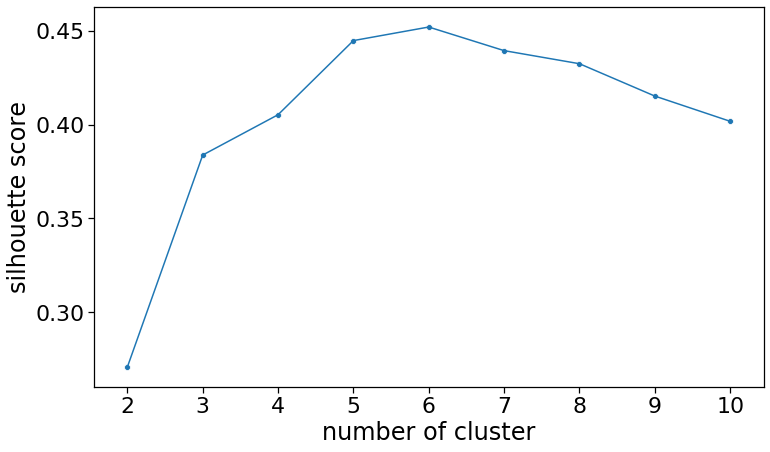

In [42]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xlabel('number of cluster')
plt.ylabel('silhouette score')
plt.show

### Final Result

In [43]:
# ambil n_cluster dari silhoutte score tertinggi
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(n_clusters=6)

In [44]:
df_mall['cluster'] = kmeans.labels_
df_mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4


* coba visualisasikan data hasil clustering kalian dengan kombinasi feature-feature yang ada. (ex: Gender& Age; Gender& Annual Income, Age & Annual income, dst)


Text(0, 0.5, 'Age')

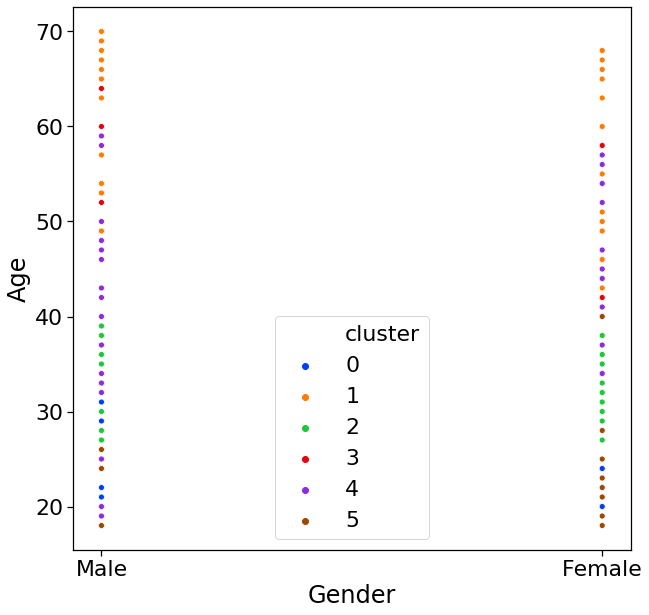

In [45]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Gender', 
    y = 'Age', 
    hue = 'cluster',
    data = df_mall,
    palette='bright')

plt.xlabel('Gender')
plt.ylabel('Age')


Text(0, 0.5, 'Annual Income')

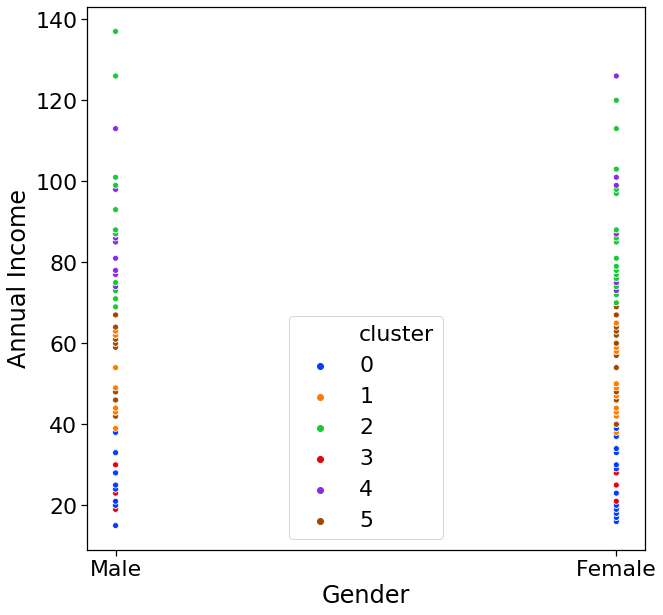

In [46]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Gender', 
    y = 'Annual Income (k$)', 
    hue = 'cluster',
    data = df_mall,
    palette='bright')

plt.xlabel('Gender')
plt.ylabel('Annual Income')


Text(0, 0.5, 'Annual Income')

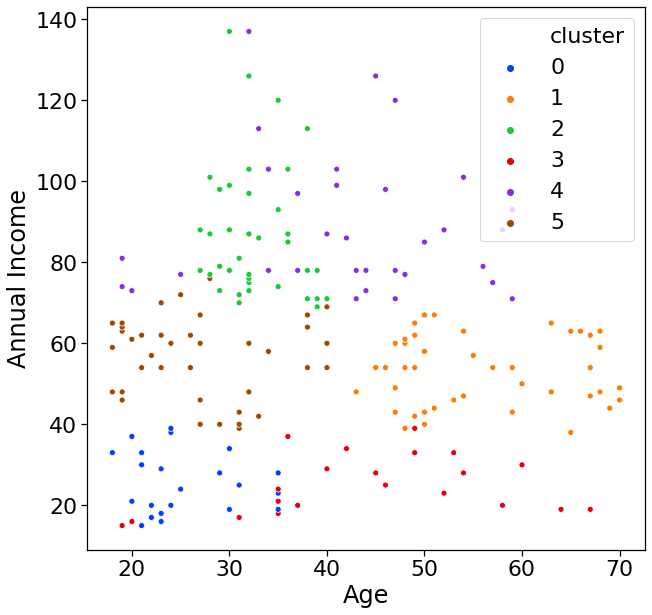

In [47]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Age', 
    y = 'Annual Income (k$)', 
    hue = 'cluster',
    data = df_mall,
    palette='bright')

plt.xlabel('Age')
plt.ylabel('Annual Income')

Text(0, 0.5, 'Annual Income')

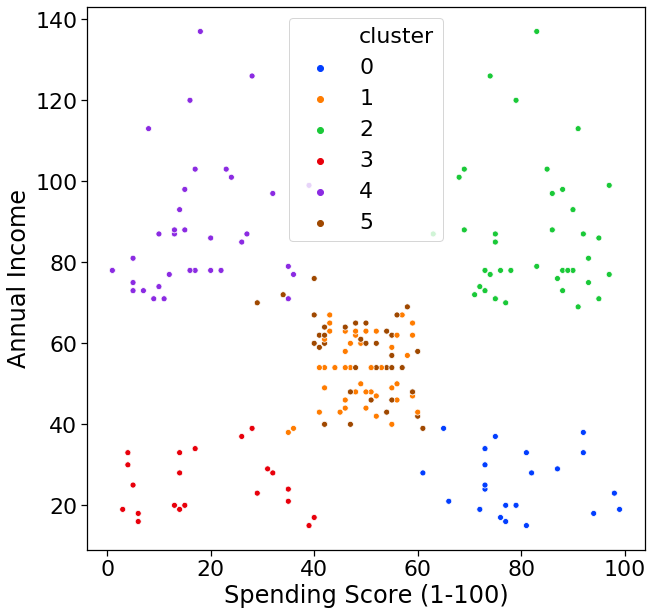

In [48]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Spending Score (1-100)', 
    y = 'Annual Income (k$)', 
    hue = 'cluster',
    data = df_mall,
    palette='bright')

plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income')

# Excercise

* Lakukan EDA singkat untuk data Mall_Customers, ada hal menarik apa yg bisa kalian simpulkan?
* Kira-kira, 2 feature mana yang paling tepat untuk digunakan dalam clustering data Mall_Customers.csv?
* Coba lakukan clustering hanya dengan feature yang kalian pilih.
* Apakah ada perubahan pada nilai K terbaik?


In [49]:
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


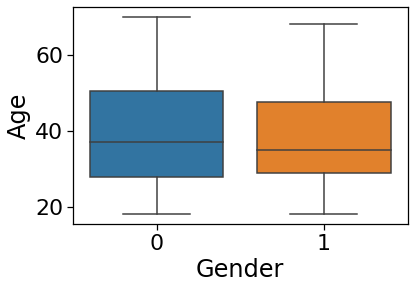

In [50]:
sns.boxplot(x='Gender', y='Age', data=X)

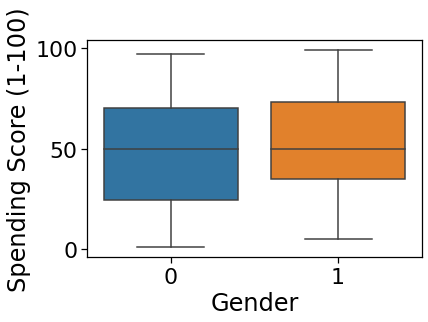

In [51]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=X)

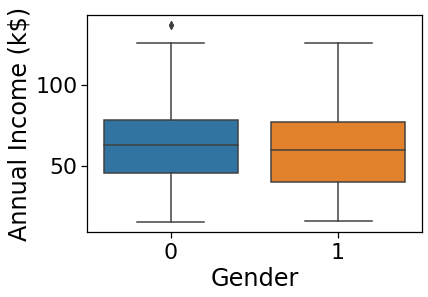

In [52]:
sns.boxplot(x='Gender', y='Annual Income (k$)', data=X)

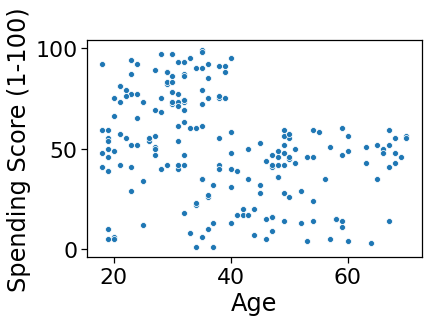

In [53]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=X)

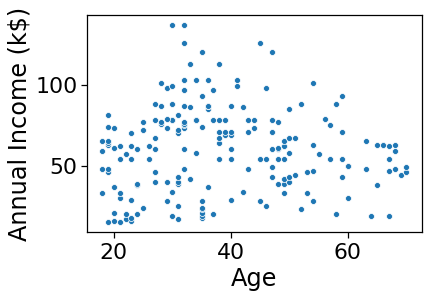

In [54]:
sns.scatterplot(x='Age', y='Annual Income (k$)', data=X)

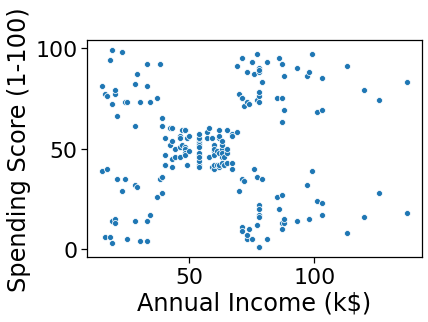

In [55]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X)